In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
pd.set_option("display.max_columns",30)

In [6]:
df=pd.read_csv("Churn_prediction/Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

## Cleaning of Data

In [12]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [13]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [17]:
df_cat=df.select_dtypes('O')

In [21]:
cat_col=[*df_cat]

In [24]:
cat_col

['Geography', 'Gender']

In [25]:
df_num=df.select_dtypes(exclude='O')

In [28]:
df_num.drop('Exited',axis=1,inplace=True)

In [29]:
df_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [44]:
num_col=[*df_num]

In [45]:
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

## Checking EDA and plotting graphs

In [32]:
df_num.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


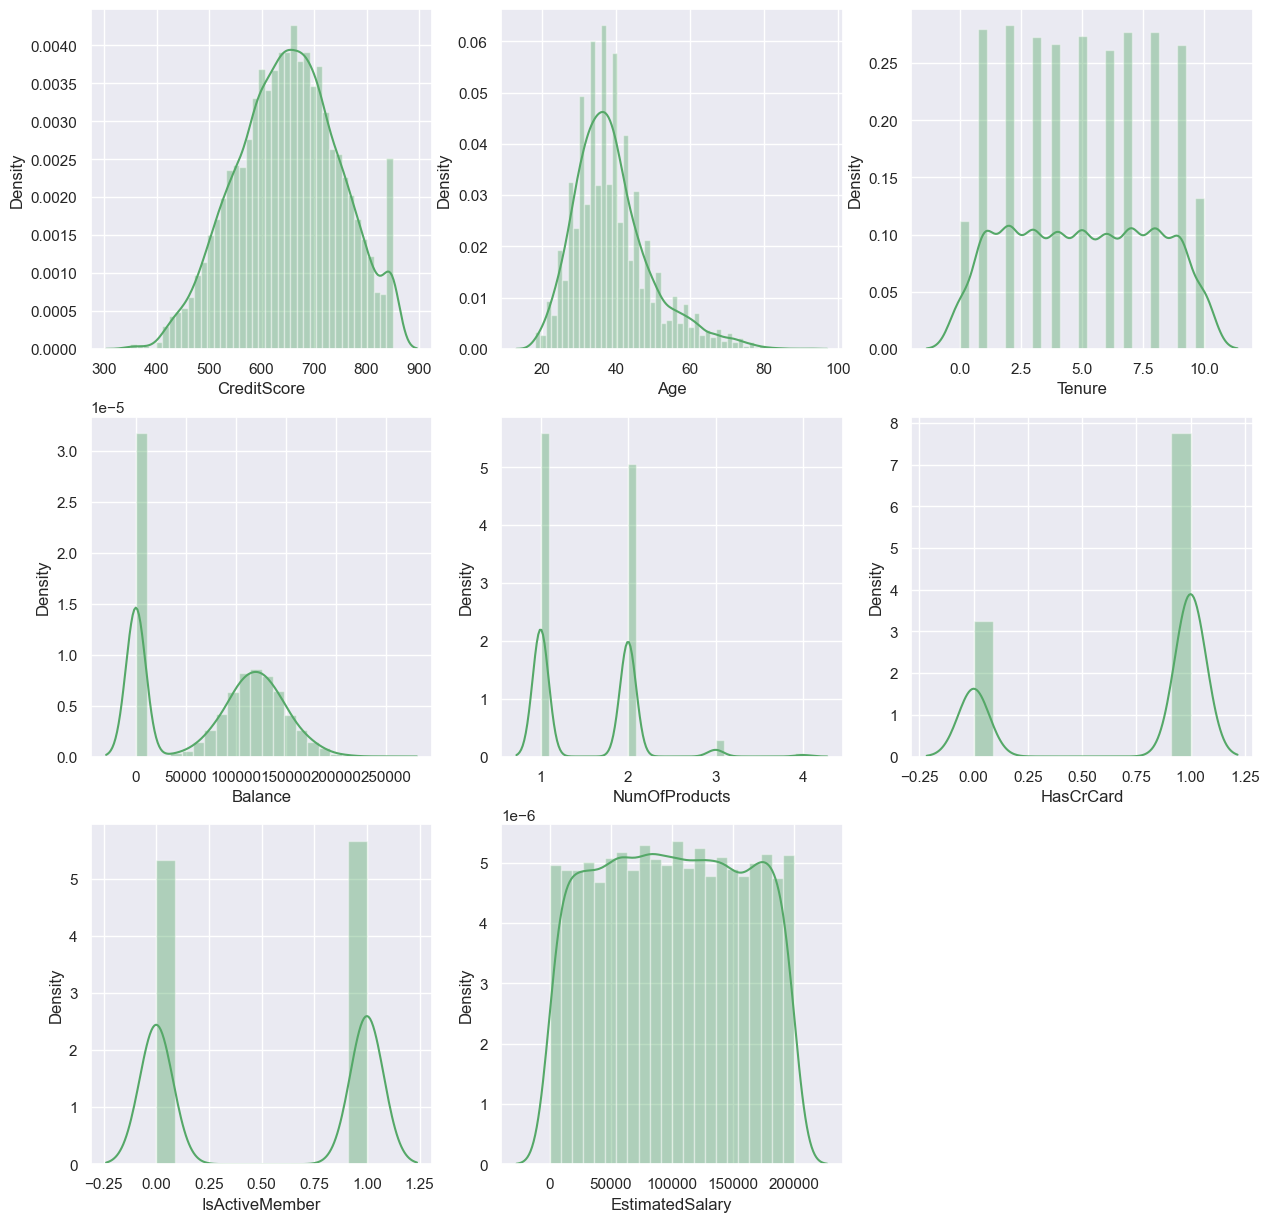

In [31]:
plt.figure(figsize=(15,15))
i=1
for col in df_num:
    plt.subplot(3,3,i)
    sns.distplot(df_num[col],color='g')
   
    i+=1
plt.show()

In [33]:
df_cat.describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [34]:
## Plotting count of categries

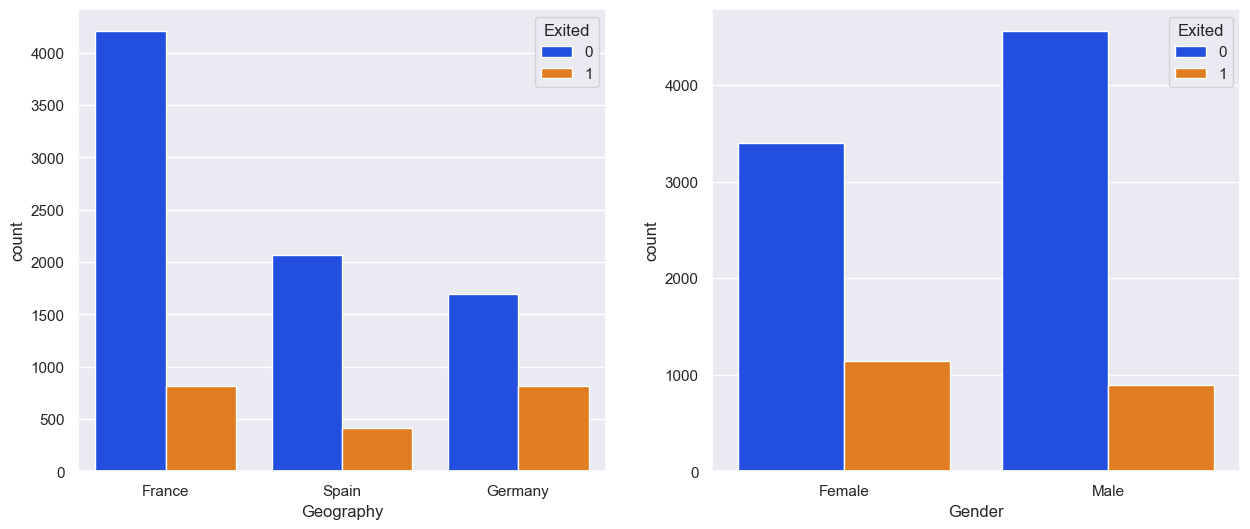

In [40]:
plt.figure(figsize=(15,6))
i=1
for col in df_cat:
    plt.subplot(1,2,i)
    sns.countplot(x=df[col],hue=df['Exited'],palette='bright')
   
    i+=1
plt.show()

## Creating Pipeline

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [42]:
cat_col

['Geography', 'Gender']

In [46]:
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [65]:
cat_pipeline=Pipeline(steps=
                     [('imputer',SimpleImputer(strategy='most_frequent')),
                       ('encoder',OneHotEncoder(sparse=False)),
                     ('scaler',StandardScaler())])
num_pipeline=Pipeline(steps=
                     [('imputer',SimpleImputer(strategy='median')),
                     ('scaler',StandardScaler())])

In [66]:
preprocessor=ColumnTransformer((["category pipeline",cat_pipeline,cat_col],
                               ['Numerical Pipeline',num_pipeline,num_col]))

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [54]:
df_final=pd.concat([df_cat,df_num],axis=1)

In [56]:
df_final.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,France,Female,619,42,2,0.00,1,1,1,101348.88
1,Spain,Female,608,41,1,83807.86,1,0,1,112542.58
2,France,Female,502,42,8,159660.80,3,1,0,113931.57
3,France,Female,699,39,1,0.00,2,0,0,93826.63
4,Spain,Female,850,43,2,125510.82,1,1,1,79084.10


In [110]:
df_final['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [58]:
X=df_final
y=df['Exited']

In [59]:
X.shape

(10000, 10)

In [60]:
y.shape

(10000,)

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [62]:
X_train.shape

(7500, 10)

In [63]:
y_train.shape

(7500,)

In [71]:
X_train_scaled=preprocessor.fit_transform(X_train)
X_test_scaled=preprocessor.transform(X_test)

In [72]:
X_train_scaled.shape

(7500, 13)

In [73]:
X_test_scaled.shape

(2500, 13)

## Creating dictionary of models and Evaluation

In [75]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "Support Vector Machine":SVC(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "XGBClassifier":XGBClassifier()
}

In [76]:
def evaluate_metrics(model,X_train,y_train,X_test,y_test):
    report={}
    i=0
    for model in models.values():
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        score=accuracy_score(y_test,y_pred)
        report[list(models.keys())[i]]=score
        i+=1
    return report


In [78]:
report=evaluate_metrics(models,X_train_scaled,y_train,X_test_scaled,y_test)

In [79]:
report

{'LogisticRegression': 0.8092,
 'DecisionTreeClassifier': 0.8016,
 'RandomForestClassifier': 0.8688,
 'GradientBoostingClassifier': 0.8736,
 'AdaBoostClassifier': 0.8604,
 'Support Vector Machine': 0.8612,
 'KNeighborsClassifier': 0.8216,
 'XGBClassifier': 0.8604}

In [85]:
np.argmax(list(report.values()))

3

In [88]:
best_model=list(report.keys())[np.argmax(list(report.values()))]

## best model and score

In [95]:
models[best_model]

GradientBoostingClassifier()

In [107]:
## Accuracy Score
report[best_model]

0.8736

## Saving the best model and preprocessor

In [93]:
import pickle

In [94]:
models[best_model]

GradientBoostingClassifier()

In [98]:
model=GradientBoostingClassifier()

In [103]:
model.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [104]:
pred=model.predict(X_test_scaled)

In [105]:
accuracy_score(y_test,pred)

0.8736

In [106]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [102]:
with open('preprocessor.pkl','wb') as file:
    pickle.dump(preprocessor,file)

In [111]:
d1={"Geography":'France','Gender':'Male','CreditScore':800,'Age':45,'Tenure':5,'Balance':100000,'NumOfProducts':4,'HasCrCard':1,
   'IsActiveMember':1,'EstimatedSalary':200000}

In [130]:
d2={"Geography":'France','Gender':'Male','CreditScore':900,'Age':45,'Tenure':5,'Balance':10000,'NumOfProducts':4,'HasCrCard':1,
   'IsActiveMember':0,'EstimatedSalary':2000}

In [115]:
test=pd.DataFrame(d1,index=[0])

In [116]:
test

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,France,Male,800,45,5,100000,4,1,1,200000


In [118]:
test_scaled=preprocessor.transform(test)

In [119]:
test_scaled

array([[ 1.00293765, -0.57652915, -0.58042949, -0.90331646,  0.90331646,
         1.54703802,  0.57055247, -0.00787995,  0.37946648,  4.2411256 ,
         0.64344941,  0.96720415,  1.75348639]])

In [124]:
model.predict(test_scaled)[0]

1

In [131]:
test2=pd.DataFrame(d2,index=[0])

In [132]:
test2_scaled=preprocessor.transform(test2)

In [133]:
model.predict(test2_scaled)

array([1], dtype=int64)

In [135]:
preprocess_loaded=pickle.load(open('preprocessor.pkl','rb'))

In [136]:
list1=['France','Male',900,45,5,10000,4,1,
   0,2000]

In [ ]:
preprocess_loaded.transform([list1])